# Exercise 2 - Solution of the steady two-dimensional heat equation

## Governing equation
We wish to compute the numerical solution of the two-dimensional heat equation:

$$ \dfrac{\partial^2 T}{\partial x^2} + \dfrac{\partial^2 T}{\partial y^2} = 0 $$

## Computational domain
We will solve this PDE using a finite difference method that is second-order accurate in space in a rectangular domain as shown below:

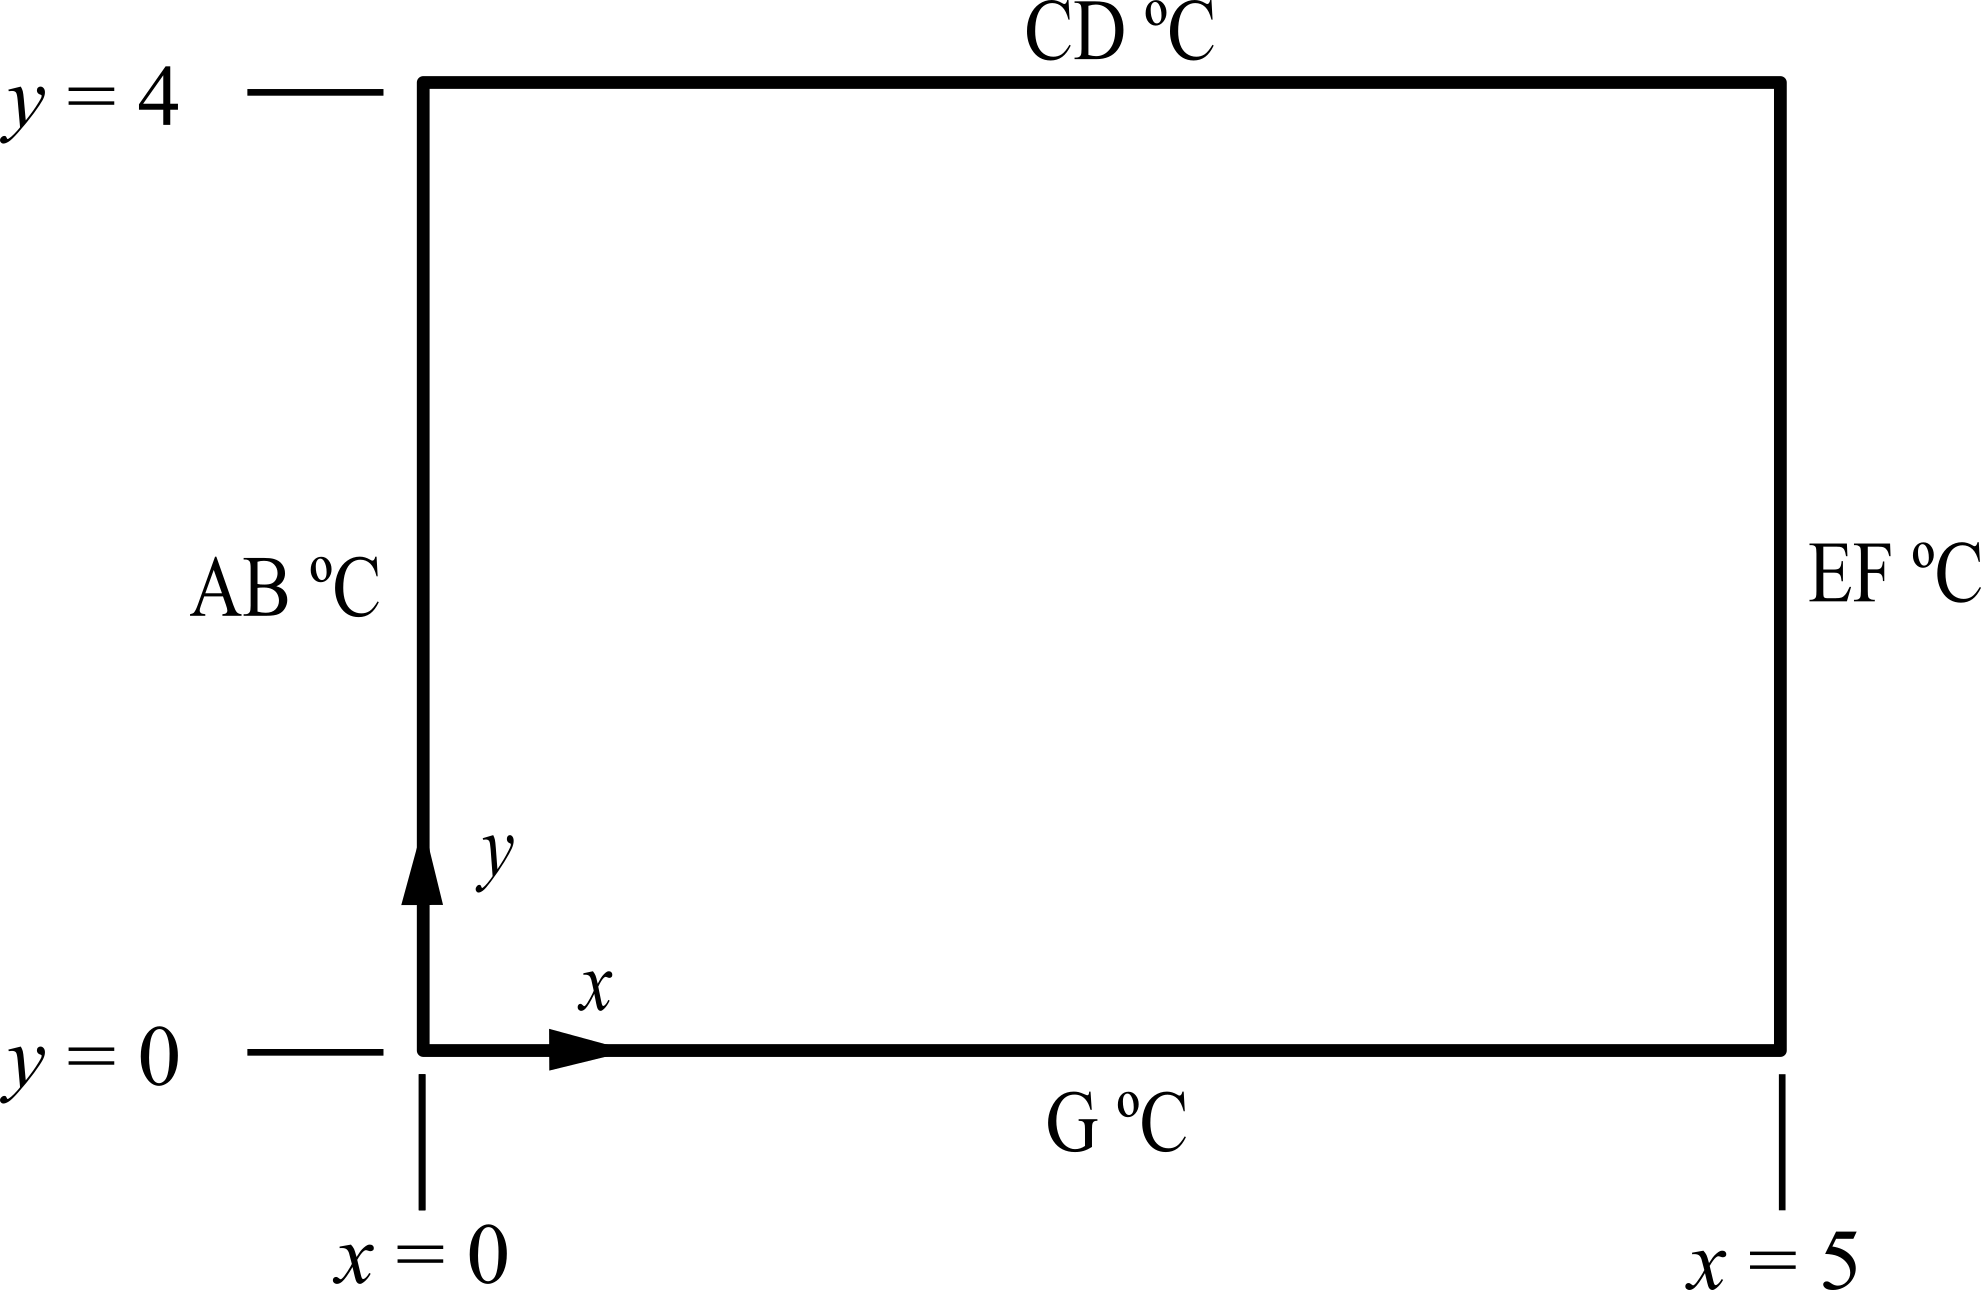

## Boundary conditions
We will impose the following boundary conditions:

$$AB = 10^{\circ}\text{C}$$
$$CD = 0^{\circ}\text{C}$$
$$EF = 40^{\circ}\text{C}$$
$$G = 20^{\circ}\text{C}$$

## Numerical schemes

We will use the following numerical schemes to solve this system:

### Jacobi method
The temperature at a cell with index $i,j$ at a new iteration level $k$ is estimated in the Jacobi method as
$$ T_{i,j}^{k+1} = \dfrac{T_{i+1,j}^k + T_{i-1,j}^{k} + \beta^2 \left(T_{i,j+1}^k + T_{i,j-1}^{k}\right)}{2\left(1 + \beta^2\right)}, $$
where $\beta$ is the grid aspect ratio $\beta = \Delta x / \Delta y$.
### Point Gauss-Seidel method
The point Gauss-Seidel method improves upon the Jacobi method by using the updated temperature field whenever it is available. The equation is
$$ T_{i,j}^{k+1} = \dfrac{T_{i+1,j}^k + T_{i-1,j}^{k+1} + \beta^2 \left(T_{i,j+1}^k + T_{i,j-1}^{k+1}\right)}{2\left(1 + \beta^2\right)}. $$
Note that it is very similar to the Jacobi method, except that the $T_{i-1,j}$ and $T_{i,j-1}$ are evaluated using the updated temperature at the $k+1$ iterate rather than the current iterate $k$. As a result, the point Gauss-Seidel should converge to the final solution much more rapidly than the Jacobi method. In other words, a fewer number of $k$ iterations will be required.

### Point successive over-relaxation
Point successive over-relaxation is a technique to accelerate the Gauss-Seidel iteration method. Suppose that during the Gauss-Seidel iteration process, we note the value at a given point changes in a particular direction after each iteration. What if we anticipated this change and made the correction to the variable before the next iteration? In effect, this means that when the iterative procedure wants to correct a variable by a certain amount, we multiply the correction by a factor $\omega$, called the relaxation parameter. Over-relaxation puts the value closer to the final solution and thus accelerates convergence. The equation for point-successive over-relaxation is thus:
\begin{equation*}
T_{i,j}^{k+1} = \dfrac{\omega}{2(1+\beta^2)} \left[T_{i+1,j}^k + T_{i-1,j}^{k+1} + \beta^2 \left(T_{i,j+1}^k + T_{i,j-1}^{k+1}\right)\right] + (1 - \omega)T_{i,j}^k
\end{equation*}
where $1 < \omega < 2$. For $\omega = 1$, we obtain the Gauss-Seidel iteration.

## Python code
Import Python classes:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define maximum number of iterations:

In [2]:
max_k = 20000

Define the spatial grid information:

In [3]:
xlen = 5.
ylen = 4.
dx = 0.05
dy = 0.05
nx = int(xlen/dx + 1)
ny = int(ylen/dy + 1)
beta = dx/dy
omega = 1.78

Define the residual threshold for the algebraic solution:

In [4]:
eps_max = 0.01

Generate the mesh array:

In [5]:
x = np.linspace(0.,xlen, nx)
y = np.linspace(0.,ylen, ny)

Assign the initial conditions:

In [6]:
T = np.zeros((nx,ny))

Assign the boundary conditions:

In [7]:
for i in range(1,nx-1):
    T[i,0] = 20      # lower wall = 20C
    T[i,ny-1] = 0    # upper wall = 0C
    
for i in range(ny-1):
    T[0,i] = 10      # left wall = 10C
    T[nx-1,i] = 40   # right wall = 40C

Initialize the temperature array at the new iteration. Note, array copy must be used, or else Tkp1 will merely link to T and change whenever T changes.

In [8]:
Tkp1 = np.copy(T)
eps = []

print('k','|', 'Residual')
print('------------')

k | Residual
------------


Solve the discrete algebraic equation using the Jacobi method:

In [9]:
for k in range(max_k):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            
            # Point Jacobi method
#            Tkp1[i,j] = 0.5/(1.0+beta**2) * (T[i+1,j] + T[i-1,j]) + (0.5*beta**2)/(1.0+beta**2) * (T[i,j+1]+T[i,j-1])
            
            # Point Gauss-Seidel method
#            Tkp1[i,j] = 0.5/(1.0+beta**2) * (T[i+1,j] + Tkp1[i-1,j]) + (0.5*beta**2)/(1.0+beta**2) * (T[i,j+1]+Tkp1[i,j-1])
            
            # Point Successive Over-relaxation
            Tkp1[i,j] = omega*0.5/(1.0+beta**2) * (T[i+1,j] + Tkp1[i-1,j]) + (omega*0.5*beta**2)/(1.0+beta**2) * (T[i,j+1]+Tkp1[i,j-1]) + (1-omega)*T[i,j]

    # Define residual error as the maximum absolute difference between subsequent iterates            
    eps = np.append(eps,np.amax(np.absolute(np.subtract(Tkp1,T))))
    
    # Copy new temperature field to old temperature array
    T = np.copy(Tkp1)
    
    # Print the iteration number and residual to standard output every 25 iterations
    if (k % 25) == 0:
        print(k,'|', eps[k])
    
    # Test to see if residual error is below threshold; break if yes
    if eps[k] < eps_max:
        print('Residual threshold reached in', k, 'iterations')
        break

0 | 39.55519013768699
25 | 0.56053477626822
50 | 0.2592779466929951
75 | 0.16490923682448155
100 | 0.11402114836107913
125 | 0.08277483244104467
150 | 0.06176107267599207
175 | 0.046794071750008825
200 | 0.03578281290577934
225 | 0.02750672046606084
250 | 0.0212016149877563
275 | 0.016360707449246448
300 | 0.012627702199209168
Residual threshold reached in 323 iterations


## Plot solution

Plot the resulting temperature field using Matplotlib:

Text(0, 0.5, 'y')

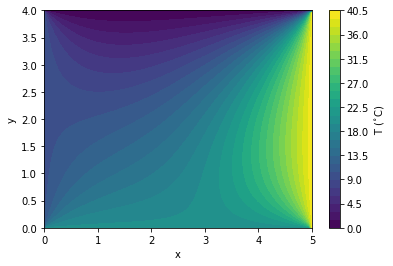

In [10]:
X, Y = np.meshgrid(x,y,indexing='ij')
plt.contourf(X,Y,T,30)
cbar=plt.colorbar()
cbar.ax.set_ylabel('T ($^{\circ}$C)')
plt.xlabel('x')
plt.ylabel('y')

Plot the decay in solution residual at each iteration:

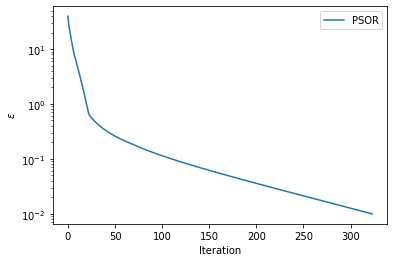

In [11]:
plt.plot(np.linspace(0,k,k+1),eps,label='PSOR')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$\epsilon$')
plt.legend()

## Performance comparison

The relative performance of the different numerical methods is compared in the below table:

| Method | Iterations   |
|--------|--------------|
| Jacobi  | 1077 |
| Point Gauss-Seidel | 968 |
| Point successive over-relaxation | 323 |

It is clearly evident that point successive over-relaxation achieves the fastest convergence. This is also seen in the solution residual plot:

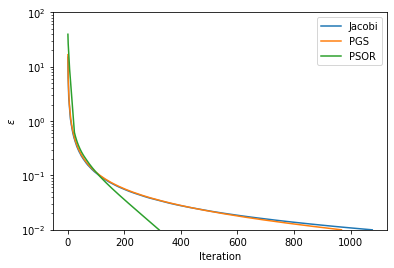